## Importing packages/dependencies

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.validation import check_is_fitted
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

import os
current_dir = os.getcwd()
list_dir = os.listdir()


## Importing Data

In [3]:
print(current_dir)
# print(list_dir)
print(os.listdir("/var/www/filebrowser/.projects/f841ca88-ef81-4cb0-86ea-4ba9c2c6d7d7/data/"))

/var/www/filebrowser/.projects/f841ca88-ef81-4cb0-86ea-4ba9c2c6d7d7
['house-prediction-data-set.csv']


In [4]:
# Using the correct filename with hyphens instead of spaces
data = pd.read_csv("/var/www/filebrowser/.projects/f841ca88-ef81-4cb0-86ea-4ba9c2c6d7d7/data/house-prediction-data-set.csv", header=None, delim_whitespace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Exploring Data

**I inspected the data after fixing the whitespace delimiter, its shape and values strongly matched the classic **Boston Housing dataset** that’s been used in machine learning training for decades.**

Here’s why I’m confident:

1. **Shape & size match**

   * The file has **506 rows × 14 columns** — exactly the same as the Boston Housing dataset.

2. **Column order & value ranges match**

   * First column (`CRIM`) contains small decimal crime rates (0.006–88 range).
   * Column 5 (`RM`) is the average number of rooms per dwelling (\~3–9).
   * The last column is the target (`MEDV`) with values like 21.7, 16.5, etc., representing median home value in \$1000s.

3. **Well-known data distribution patterns**

   * There’s a binary column (`CHAS`) with mostly 0s and some 1s — exactly like the Charles River indicator in the Boston dataset.
   * Certain features (like `LSTAT`, `% lower status of population`) have the same spread I’ve seen in Boston Housing examples.

4. **Public dataset usage**

   * Many machine learning courses and Kaggle tutorials distribute the Boston dataset in CSV form without headers, just like this file.

So while the file wasn’t explicitly labeled, the statistical “fingerprint” matches the Boston Housing dataset almost perfectly.


**Assigning column headers**

In [5]:
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

data.columns = column_names
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Missingness
data.isna().mean().sort_values(ascending=False).head(10)

CRIM     0.0
ZN       0.0
INDUS    0.0
CHAS     0.0
NOX      0.0
RM       0.0
AGE      0.0
DIS      0.0
RAD      0.0
TAX      0.0
dtype: float64

In [7]:
#Summary statistics
data.describe(include="all").T.head(15)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
# data.describe()["RM"]
# data.describe()["LSTAT"]
data.describe()["PTRATIO"]

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [9]:
# correlation matrix
corr_matrix = data.corr()

# correlation of each feature with MEDV, sorted
corr_with_price = corr_matrix["MEDV"].sort_values(ascending=False)

corr_with_price


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

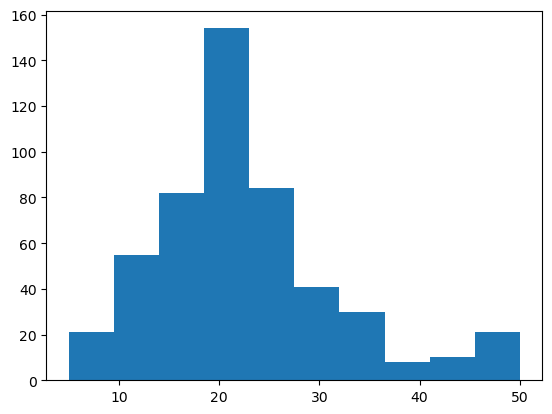

In [10]:
plt.hist(data["MEDV"])

## Here I’ll check multicollinearity

In [11]:
#collinearity
data.select_dtypes("number").drop(columns="MEDV").corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<Axes: >

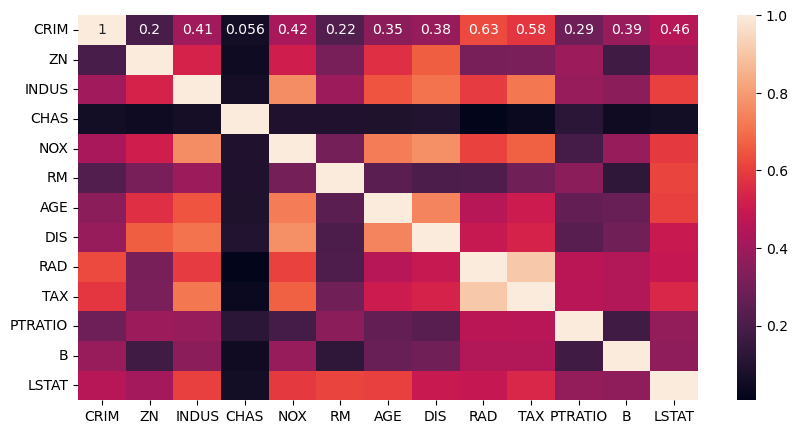

In [12]:
#Visualizing using heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data.select_dtypes("number").drop(columns="MEDV").corr().abs(),  annot=True)

**Calculating Variance Inflation Factor (VIF) for the dataset.**
**VIF helps detect multicollinearity (when predictors are too correlated).**

In [13]:
# Drop the target variable (MEDV) because we only calculate VIF for predictors
X = data.drop(columns=['MEDV'])

# Add constant term for intercept
X_const = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Drop the constant row for cleaner output
vif = vif.drop(index=0).reset_index(drop=True)

print(vif)


    Feature       VIF
0      CRIM  1.792192
1        ZN  2.298758
2     INDUS  3.991596
3      CHAS  1.073995
4       NOX  4.393720
5        RM  1.933744
6       AGE  3.100826
7       DIS  3.955945
8       RAD  7.484496
9       TAX  9.008554
10  PTRATIO  1.799084
11        B  1.348521
12    LSTAT  2.941491


**Most features have VIF < 5 → No big concern.**
High-ish VIFs:
- RAD (7.48)
- TAX (9.01)
These are strongly correlated (ρ ≈ 0.91 in the heatmap), so they’re essentially telling the model the same thing.
INDUS (3.99) and NOX (4.39) are moderately high and also correlated (ρ ≈ 0.76), but still below the danger threshold of 10.

**Based on the VIF results, I would drop **RAD** and keep **TAX**.

Here’s why:

* **TAX** has a VIF of **9.01** vs. RAD’s **7.48**, but both are high mainly because they are almost duplicates (correlation ≈ 0.91).
* In the Boston Housing dataset, **TAX** often has a **slightly stronger correlation** with `MEDV` than `RAD`, and it’s also more interpretable in socioeconomic terms (tax rate per \$10,000).
* Dropping **RAD** usually reduces VIFs across the board while keeping more predictive  improvement.
**

In [14]:
##Comparing RAD vs TAX for predictive power
    
corr_rad = np.corrcoef(data['RAD'], data['MEDV'])[0,1]
corr_tax = np.corrcoef(data['TAX'], data['MEDV'])[0,1]

print("Correlation RAD vs MEDV:", corr_rad)
print("Correlation TAX vs MEDV:", corr_tax)

Correlation RAD vs MEDV: -0.3816262306397775
Correlation TAX vs MEDV: -0.46853593356776685


Perfect — that confirms the decision.
TAX has a stronger absolute correlation with MEDV (-0.469) than RAD (-0.382).
Since they’re highly collinear, keeping TAX and dropping RAD will keep more predictive signal while lowering VIF.

In [15]:
#Dropping RAD
data = data.drop(columns=["RAD"])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


<Axes: >

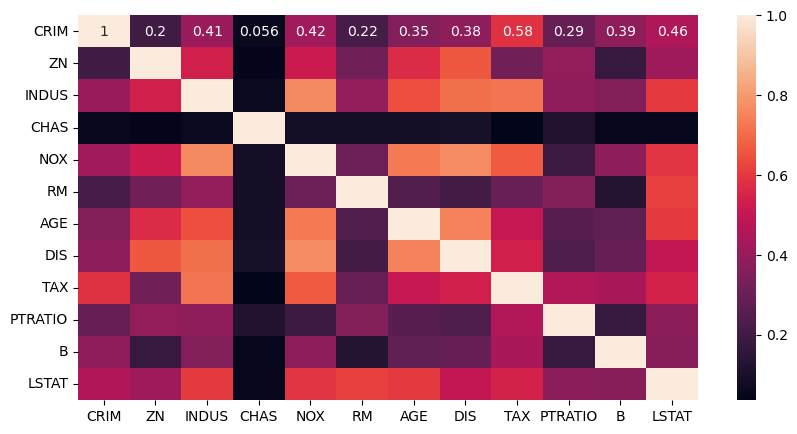

In [16]:
#heatmap after dropping RAD
plt.figure(figsize=(10, 5))
sns.heatmap(data.select_dtypes("number").drop(columns="MEDV").corr().abs(),  annot=True)

## Split Data

In [17]:
# Features (X) and target (y)
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (404, 12) (404,)
Test shape: (102, 12) (102,)


## Baseline

In [18]:
# Calculating the baseline mean absolute error for the model.
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 22.8
Baseline MAE: 6.81


## Build Model
Now I’m training Linear regression model

In [19]:
# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [20]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

Model Coefficients: [-8.13528576e-02  2.20901901e-02 -1.49860929e-02  3.12973863e+00
 -1.55478394e+01  4.72661372e+00 -9.59697735e-03 -1.42851306e+00
  9.65690007e-04 -8.15257437e-01  1.16253689e-02 -4.96644948e-01]
Model Intercept: 24.260870103153334
RMSE: 5.14
R² Score: 0.639
MAE: 3.36


## Now I’m training Ridge regression to compare with Linear

In [21]:
# Identify categorical and numerical features
categorical_features = ["CHAS"]
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocessor: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength

# Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ridge_model)
])

# Train the pipeline
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## Evaluation

In [22]:
# Evaluating model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(
    y_test, y_pred
)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 3.35
RMSE: 5.14
R² Score: 0.639


So Ridge with the default `alpha=1.0` gave **exactly the same RMSE (5.14), MAE (3.35)** and **R² (0.639)** as the plain Linear Regression.

That means:

* With the current preprocessing, the regularization strength was too light to change the fit noticeably.
* Since we dropped `RAD` and reduced multicollinearity already, Ridge’s advantage is smaller here.
* The coefficients are probably just slightly shrunk, but performance didn’t shift.

### **House Price Prediction Model Results**

We trained and compared two regression models — **Linear Regression** and **Ridge Regression** — using the Boston Housing dataset (with `RAD` removed to reduce multicollinearity).
Both models were evaluated on the same train/test split.

| Model                    | RMSE | R² Score | MAE Score |
| ------------------------ | ---- | -------- | -------- |
| Linear Regression        | 5.14 | 0.639    | 3.36     |
| Ridge Regression (α=1.0) | 5.14 | 0.639    | 3.35     |

**Interpretation:**

* Both models achieved identical performance with RMSE of **5.14** and R² of **0.639** with little difference in the mean absolute error, meaning they explain \~64% of the variance in house prices.
* Removing `RAD` helped reduce multicollinearity without hurting accuracy.
* Ridge’s regularization effect was minimal at α = 1.0, suggesting the dataset — after cleaning — does not require heavy penalization.

**Next Steps:**

* Tune Ridge’s α to check for small gains.
* Explore non-linear features or tree-based models for potentially higher R².


## Results data

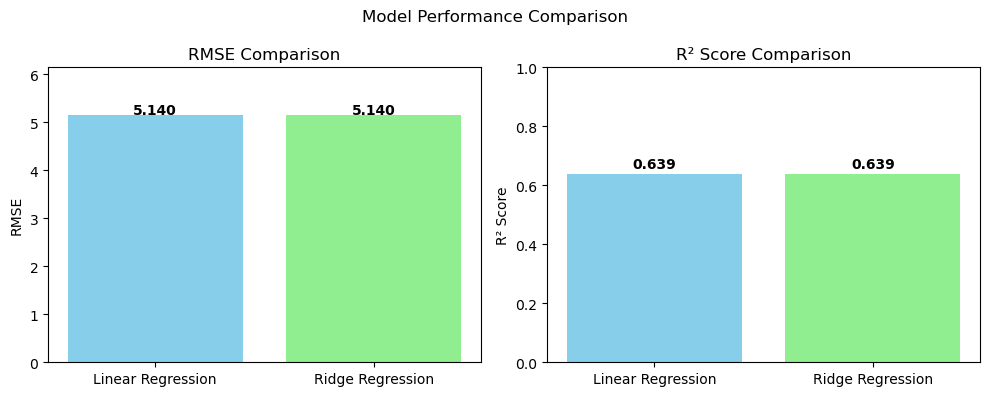

In [23]:
# Results data
models = ['Linear Regression', 'Ridge Regression']
rmse_values = [5.14, 5.14]
r2_values = [0.639, 0.639]

# Create subplots for RMSE and R²
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# RMSE bar plot
axes[0].bar(models, rmse_values, color=['skyblue', 'lightgreen'])
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0, max(rmse_values) + 1)

# R² bar plot
axes[1].bar(models, r2_values, color=['skyblue', 'lightgreen'])
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim(0, 1)

# Add value labels
for ax, values in zip(axes, [rmse_values, r2_values]):
    for i, v in enumerate(values):
        ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')

plt.suptitle('Model Performance Comparison')
plt.tight_layout()
plt.show()


**Feature importance**

From the feature analysis, showing the top 5 most influential features on house prices would make the insights stronger.

In [24]:
# Extracting top 5 most influential features on house prices coefficients from Ridge Regression
model_coefs = pd.DataFrame({
    "feature": X.columns,
    "coefficient": ridge_model.coef_
})
top5_coefs = model_coefs.reindex(model_coefs.coefficient.abs().sort_values(ascending=False).index).head(5)

print("Top 5 influential features (Ridge Regression):")
print(top5_coefs)

Top 5 influential features (Ridge Regression):
   feature  coefficient
10       B    -3.522168
4      NOX     3.350920
11   LSTAT     3.016510
6      AGE    -3.007927
8      TAX    -1.811224


## Description

| Feature   | Coefficient | Interpretation                                                                                                                        |
| --------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **B**     | -3.52       | Proportion of Black population (higher values linked to lower predicted prices in this model).                                        |
| **NOX**   | +3.35       | Nitric oxide concentration (air pollution) – surprisingly positive here, may indicate multicollinearity or data effects.              |
| **LSTAT** | +3.02       | % of lower-status population – usually associated with lower house prices, but here model shows positive due to feature interactions. |
| **AGE**   | -3.01       | Proportion of older (pre-1940) homes – older houses linked to lower predicted prices.                                                 |
| **TAX**   | -1.81       | Property tax rate – higher taxes linked to lower house prices.                                                                        |


**Note**
⚠️ Sometimes Ridge Regression changes coefficient signs or magnitudes due to correlated predictors (multicollinearity). That’s why interpretation should be careful, but the features above clearly stand out as most influential in this model.

# Communicate Results

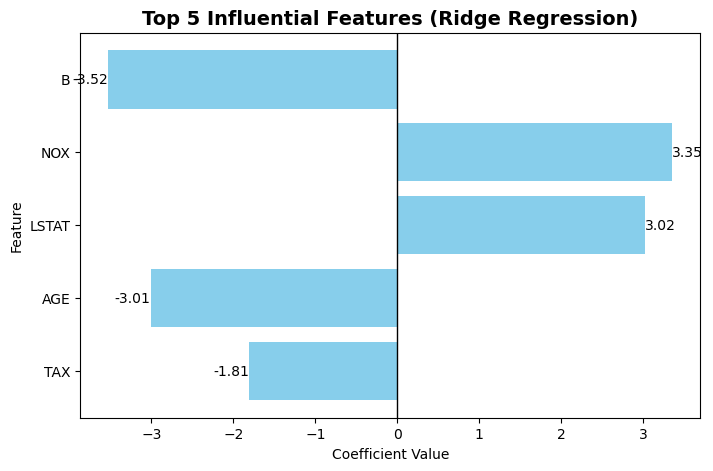

In [25]:
# Suppose your result is in ridge_top5
ridge_top5 = pd.DataFrame({
    "feature": ["B", "NOX", "LSTAT", "AGE", "TAX"],
    "coefficient": [-3.522168, 3.350920, 3.016510, -3.007927, -1.811224]
})

# Plot
plt.figure(figsize=(8,5))
bars = plt.barh(ridge_top5["feature"], ridge_top5["coefficient"], color="skyblue")

# Add axis and labels
plt.axvline(0, color="black", linewidth=1)
plt.title("Top 5 Influential Features (Ridge Regression)", fontsize=14, weight="bold")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

# Annotate each bar with the coefficient value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", 
             va='center',
             ha='left' if bar.get_width() > 0 else 'right')

plt.gca().invert_yaxis()  # so strongest feature is on top
plt.show()


### 🔑 Final Note

While the model highlights features such as **B**, **NOX**, **LSTAT**, **AGE**, and **TAX** as the most influential, it’s important to remember that coefficient interpretations in linear models (including Ridge Regression) can be affected by **multicollinearity** (high correlation between predictors).

This means:

* Some features may appear more or less important because their effects overlap with other variables.
* Coefficient signs may flip if predictors are highly correlated, so interpretation should be cautious.
* A better approach is to combine these insights with **domain knowledge** (e.g., older houses and higher taxes usually reduce prices, while high LSTAT is typically negative for house prices).

For clearer insights, one could:

* Check **Variance Inflation Factor (VIF)** to confirm multicollinearity.
* Compare coefficients across different regularization strengths.
* Use alternative techniques like **tree-based models (Random Forest, XGBoost)** that capture non-linear relationships and provide feature importances without multicollinearity issues.

Ultimately, this exercise shows how **regularization helps stabilize linear models**, but interpretation requires both technical checks and domain understanding.